# Figures for FluidSF paper

In [97]:
import warnings

import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
warnings.filterwarnings("ignore")

## Figure 1: Structure functions from a 2D simulation

In [178]:
import h5py

# f = h5py.File('../../docs/source/example_data/2layer_128.jld2', 'r')
f = h5py.File('/Users/cassswagner/Downloads/2D_TwoLayer_Data.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x'][()]
y = grid['y'][()]

# Grab the top layer and final snapshot of the simulation for u, v, and q
u = snapshots['u']['20050'][0]
v = snapshots['v']['20050'][0]
q = snapshots['q']['20050'][0]

In [179]:
import fluidsf

sf = fluidsf.generate_structure_functions(
    u=u, v=v, x=x, y=y, scalar=q, sf_type=["ASF_V", "ASF_S", "LLL", "LSS"]
)

In [180]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

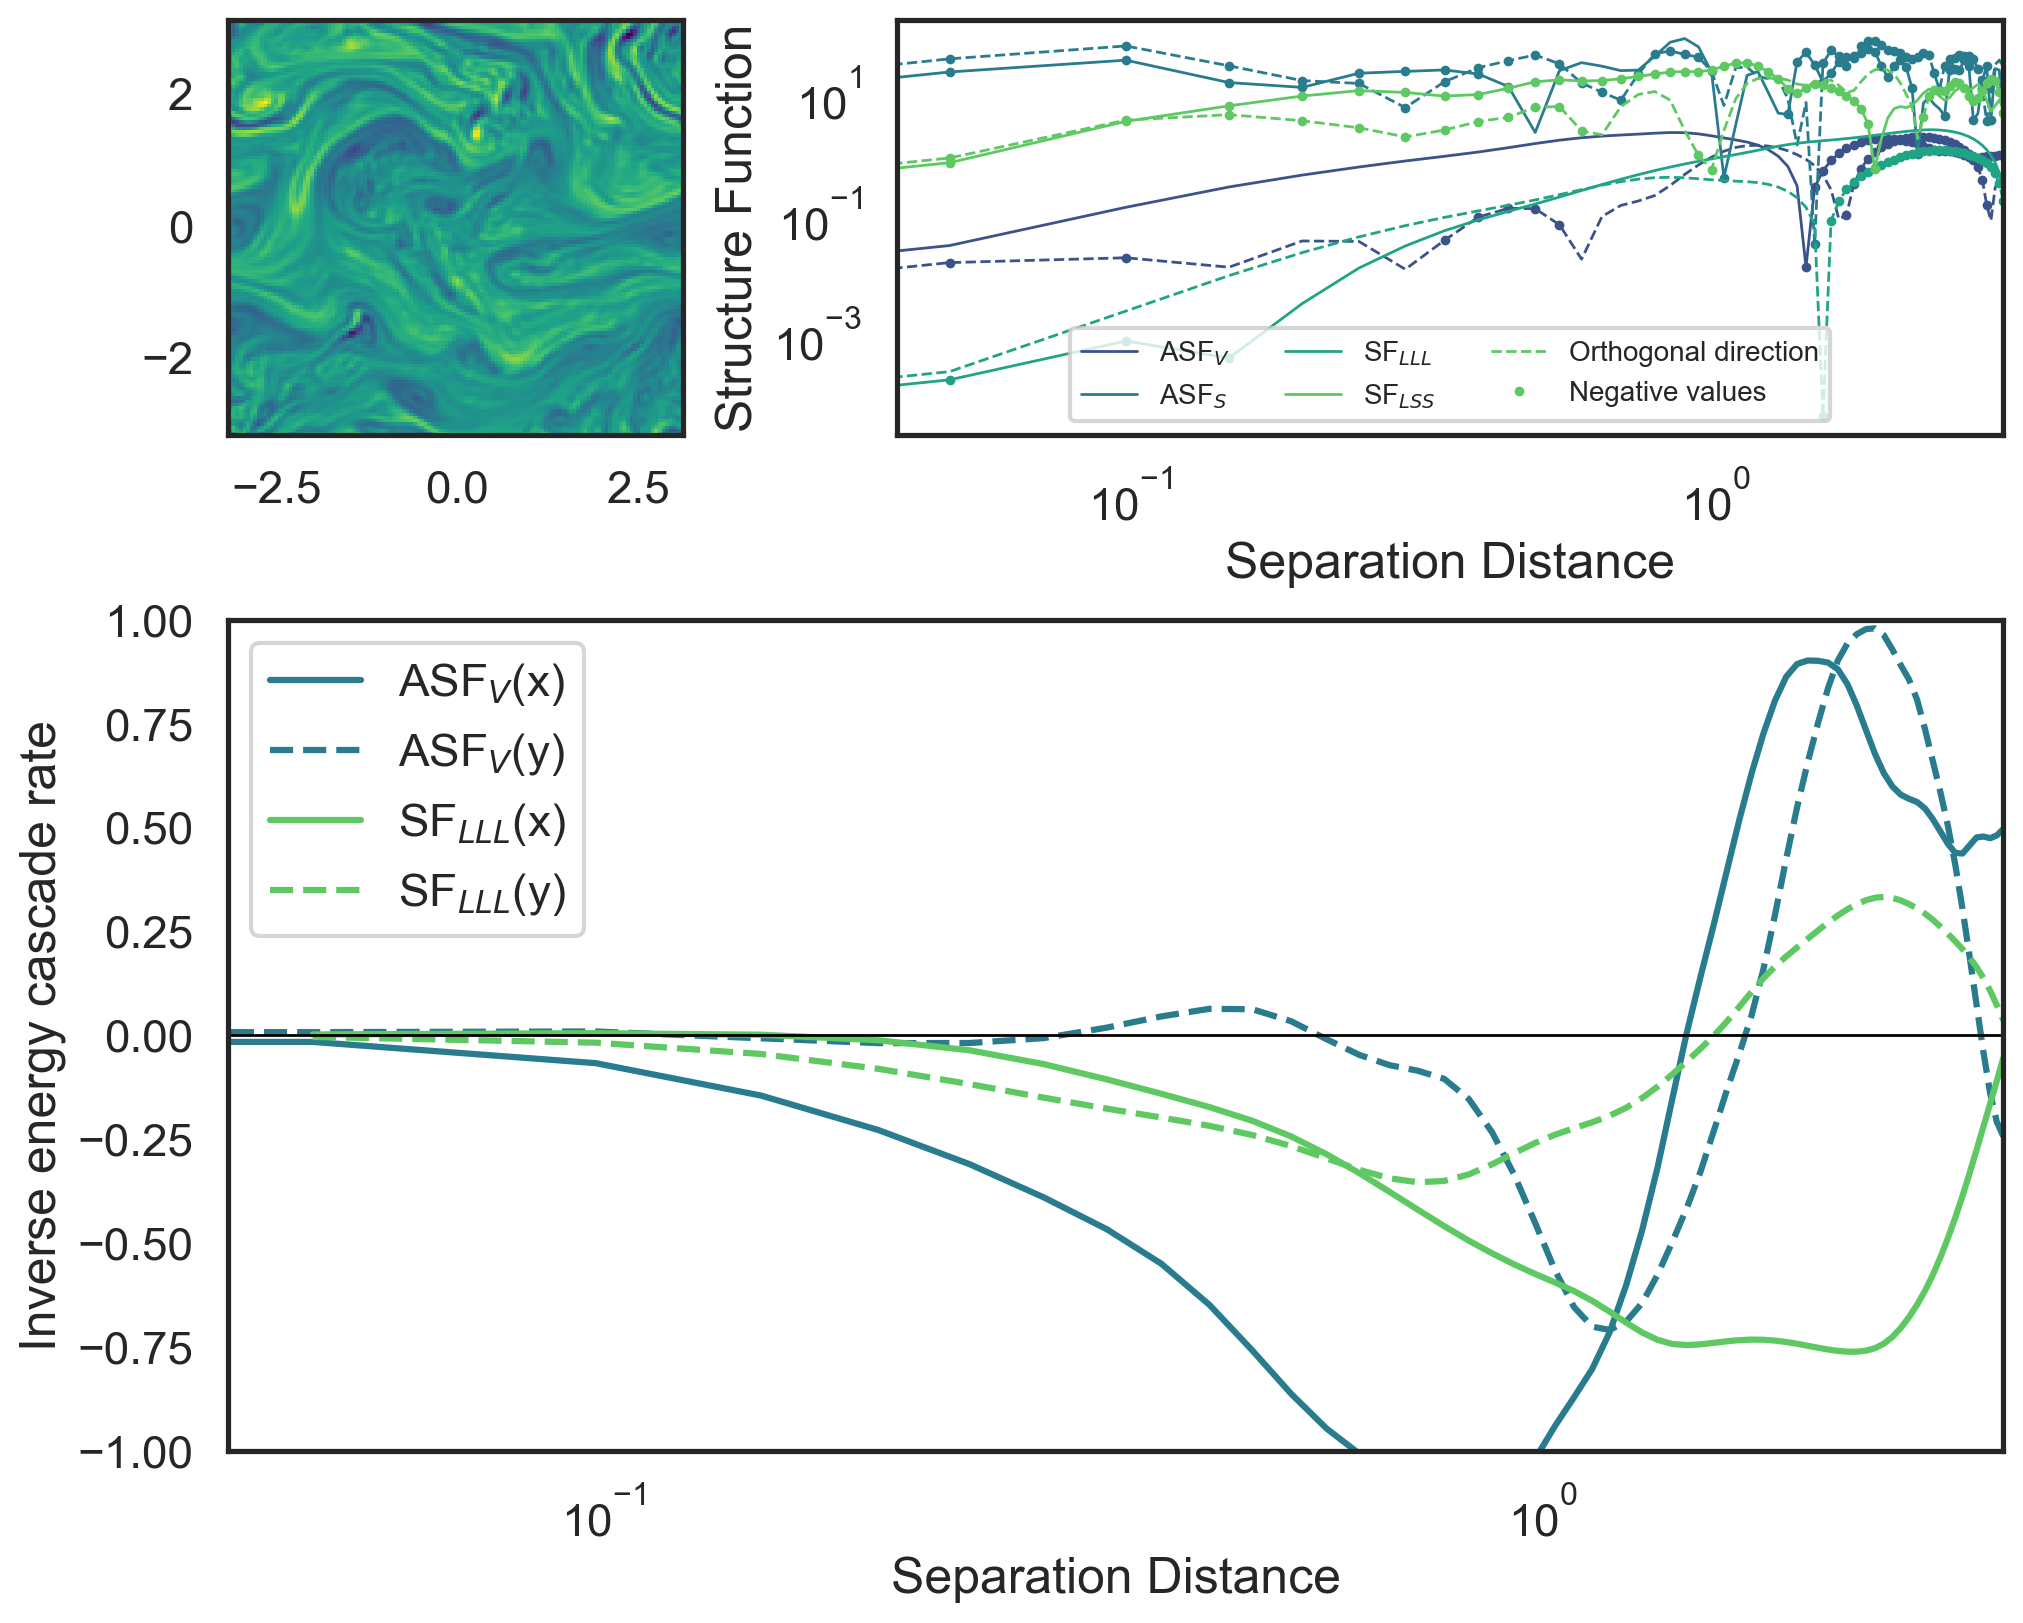

In [181]:
colors = plt.cm.viridis(np.linspace(0.25, 0.75, 4))

fig = plt.figure(layout="constrained", figsize=(10, 8))

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1:, :])

ax1.pcolormesh(x, y, q, cmap="viridis")

ax2.loglog(
    sf["x-diffs"], abs(sf["SF_advection_velocity_x"]), label="ASF$_V$", color=colors[0],
    lw=1,
)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_advection_velocity_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[0],
)
ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_advection_velocity_y"]),
    color=colors[0],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_advection_velocity_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[0],
)

ax2.loglog(
    sf["x-diffs"], abs(sf["SF_advection_scalar_x"]), label="ASF$_S$", color=colors[1],lw=1,
)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_advection_scalar_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[1],
)
ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_advection_scalar_y"]),
    color=colors[1],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_advection_scalar_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[1],
)

ax2.loglog(sf["x-diffs"], abs(sf["SF_LLL_x"]), label="SF$_{LLL}$", color=colors[2],lw=1,)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_LLL_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[2],
)

ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_LLL_y"]),
    color=colors[2],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_LLL_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[2],
)

ax2.loglog(sf["x-diffs"], abs(sf["SF_LSS_x"]), label="SF$_{LSS}$", color=colors[3],lw=1,)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_LSS_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[3],
)

ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_LSS_y"]),
    color=colors[3],
    lw=1,
    linestyle="dashed",
    label="Orthogonal direction",
)

ax2.loglog(
    sf["y-diffs"],
    -sf["SF_LSS_y"],
    marker=".",
    ms=5,
    label="Negative values",
    lw=0,
    color=colors[3],
)

ax2.set_xlabel("Separation Distance")
ax2.set_ylabel("Structure Function")
ax2.legend(ncol=3, loc="lower center", fontsize="10")
ax2.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())


ax3.semilogx(sf["x-diffs"], -sf["SF_advection_velocity_x"]/2, color=colors[1], label="ASF$_V$(x)")
ax3.semilogx(sf["y-diffs"], -sf["SF_advection_velocity_y"]/2, color=colors[1], linestyle="dashed", label="ASF$_V$(y)")
ax3.semilogx(sf["x-diffs"], -2 * sf["SF_LLL_x"] / (3*sf["x-diffs"]), color=colors[3], label="SF$_{LLL}$(x)")
ax3.semilogx(sf["y-diffs"], -2 * sf["SF_LLL_y"] / (3*sf["y-diffs"]), color=colors[3], linestyle="dashed", label="SF$_{LLL}$(y)")
ax3.hlines(0, sf["x-diffs"].min(), sf["x-diffs"].max(), lw=1, color="black")
ax3.set_xlabel("Separation Distance")
ax3.set_ylabel("Inverse energy cascade rate")
ax3.set_ylim(-1,1)
ax3.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())
ax3.legend();

## Figure 3: 2D map of SFs from a 2D simulation

In [182]:
sf_maps = fluidsf.generate_sf_maps_2d(
    u=u, v=v, x=x, y=y, sf_type=["ASF_V", "LLL", "LL"]
)

In [183]:
TwoD_map_x_separations = np.append(
    -np.flip(sf_maps["x_separations"]), sf_maps["x_separations"], axis=0
)
TwoD_map_y_separations = np.append(
    -np.flip(sf_maps["y_separations"]), sf_maps["y_separations"], axis=0
)
TwoD_map_advective_SF = np.append(
    np.flip(sf_maps["SF_advection_velocity_xy"]),
    sf_maps["SF_advection_velocity_xy"],
    axis=0,
)
TwoD_map_LL_SF = np.append(
    np.flip(sf_maps["SF_LL_xy"]), sf_maps["SF_LL_xy"], axis=0
)
TwoD_map_LLL_SF = np.append(
    np.flip(sf_maps["SF_LLL_xy"]), sf_maps["SF_LLL_xy"], axis=0
)

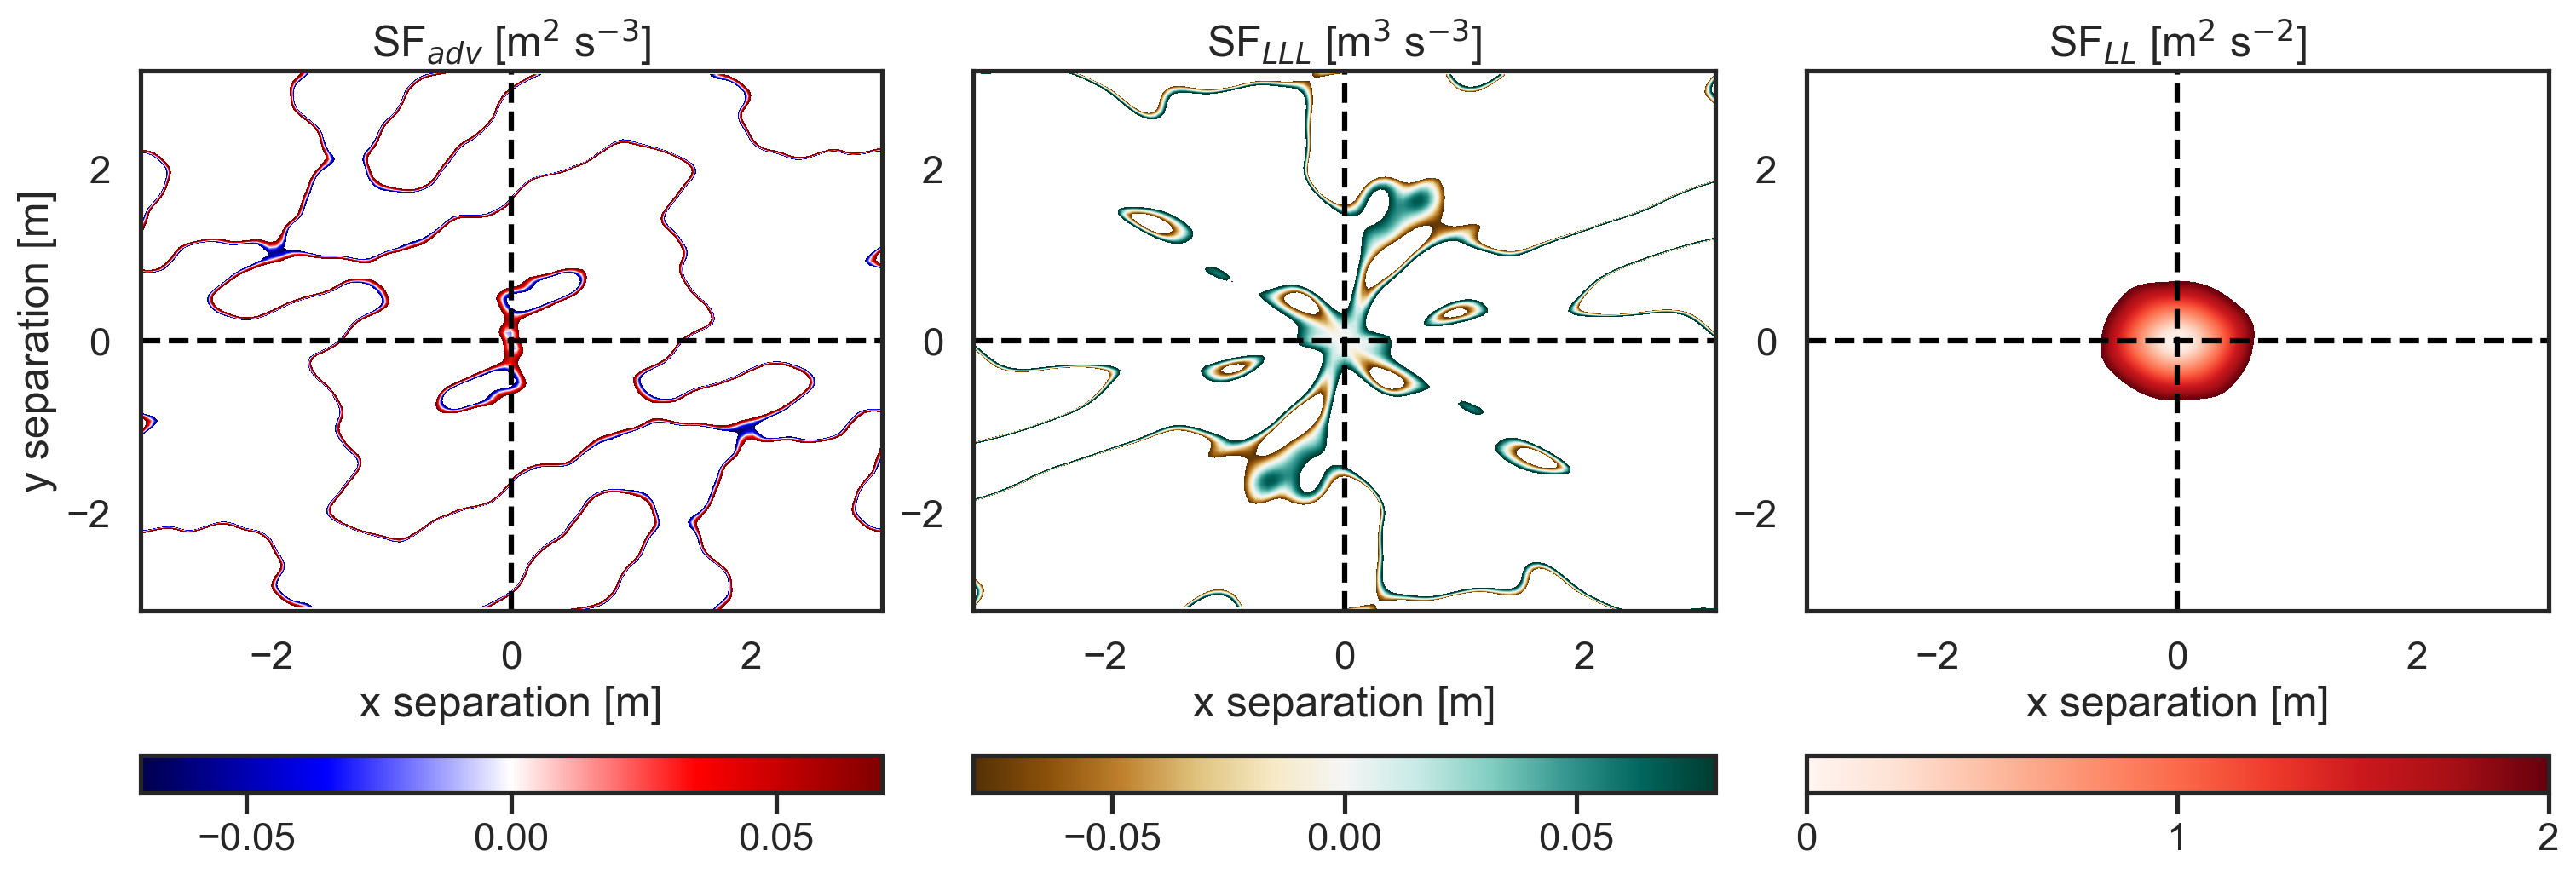

In [185]:
fig, axs = plt.subplots(1,3, figsize=(15,5), layout='constrained')

Advective = axs[0].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_advective_SF, 
            levels=np.linspace(-0.07, 0.07, 1001), 
                            cmap=plt.cm.seismic)
axs[0].set_xlabel('x separation [m]')
axs[0].set_ylabel('y separation [m]')
axs[0].set_title('SF$_{adv}$ [m$^2$ s$^{-3}$]')

cbar = fig.colorbar(Advective, ax=axs[0], location='bottom')
cbar.set_ticks([-0.05, 0, 0.05])
axs[0].axhline(0, color='black', linestyle='--')
axs[0].axvline(0, color='black', linestyle='--')

LLL = axs[1].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_LLL_SF, 
            levels=np.linspace(-0.08, 0.08, 1001), 
                            cmap=plt.cm.BrBG)
axs[1].set_xlabel('x separation [m]')
axs[1].set_title('SF$_{LLL}$ [m$^3$ s$^{-3}$]')

cbar = fig.colorbar(LLL, ax=axs[1], location='bottom')
cbar.set_ticks([-0.05, 0, 0.05])
axs[1].axhline(0, color='black', linestyle='--')
axs[1].axvline(0, color='black', linestyle='--')

LL = axs[2].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_LL_SF, 
            levels=np.linspace(0, 2, 1001), 
                            cmap=plt.cm.Reds)
axs[2].set_xlabel('x separation [m]')
axs[2].set_title('SF$_{LL}$ [m$^2$ s$^{-2}$]')

cbar = fig.colorbar(LL, ax=axs[2], location='bottom')
cbar.set_ticks([0, 1, 2])
axs[2].axhline(0, color='black', linestyle='--')
axs[2].axvline(0, color='black', linestyle='--')

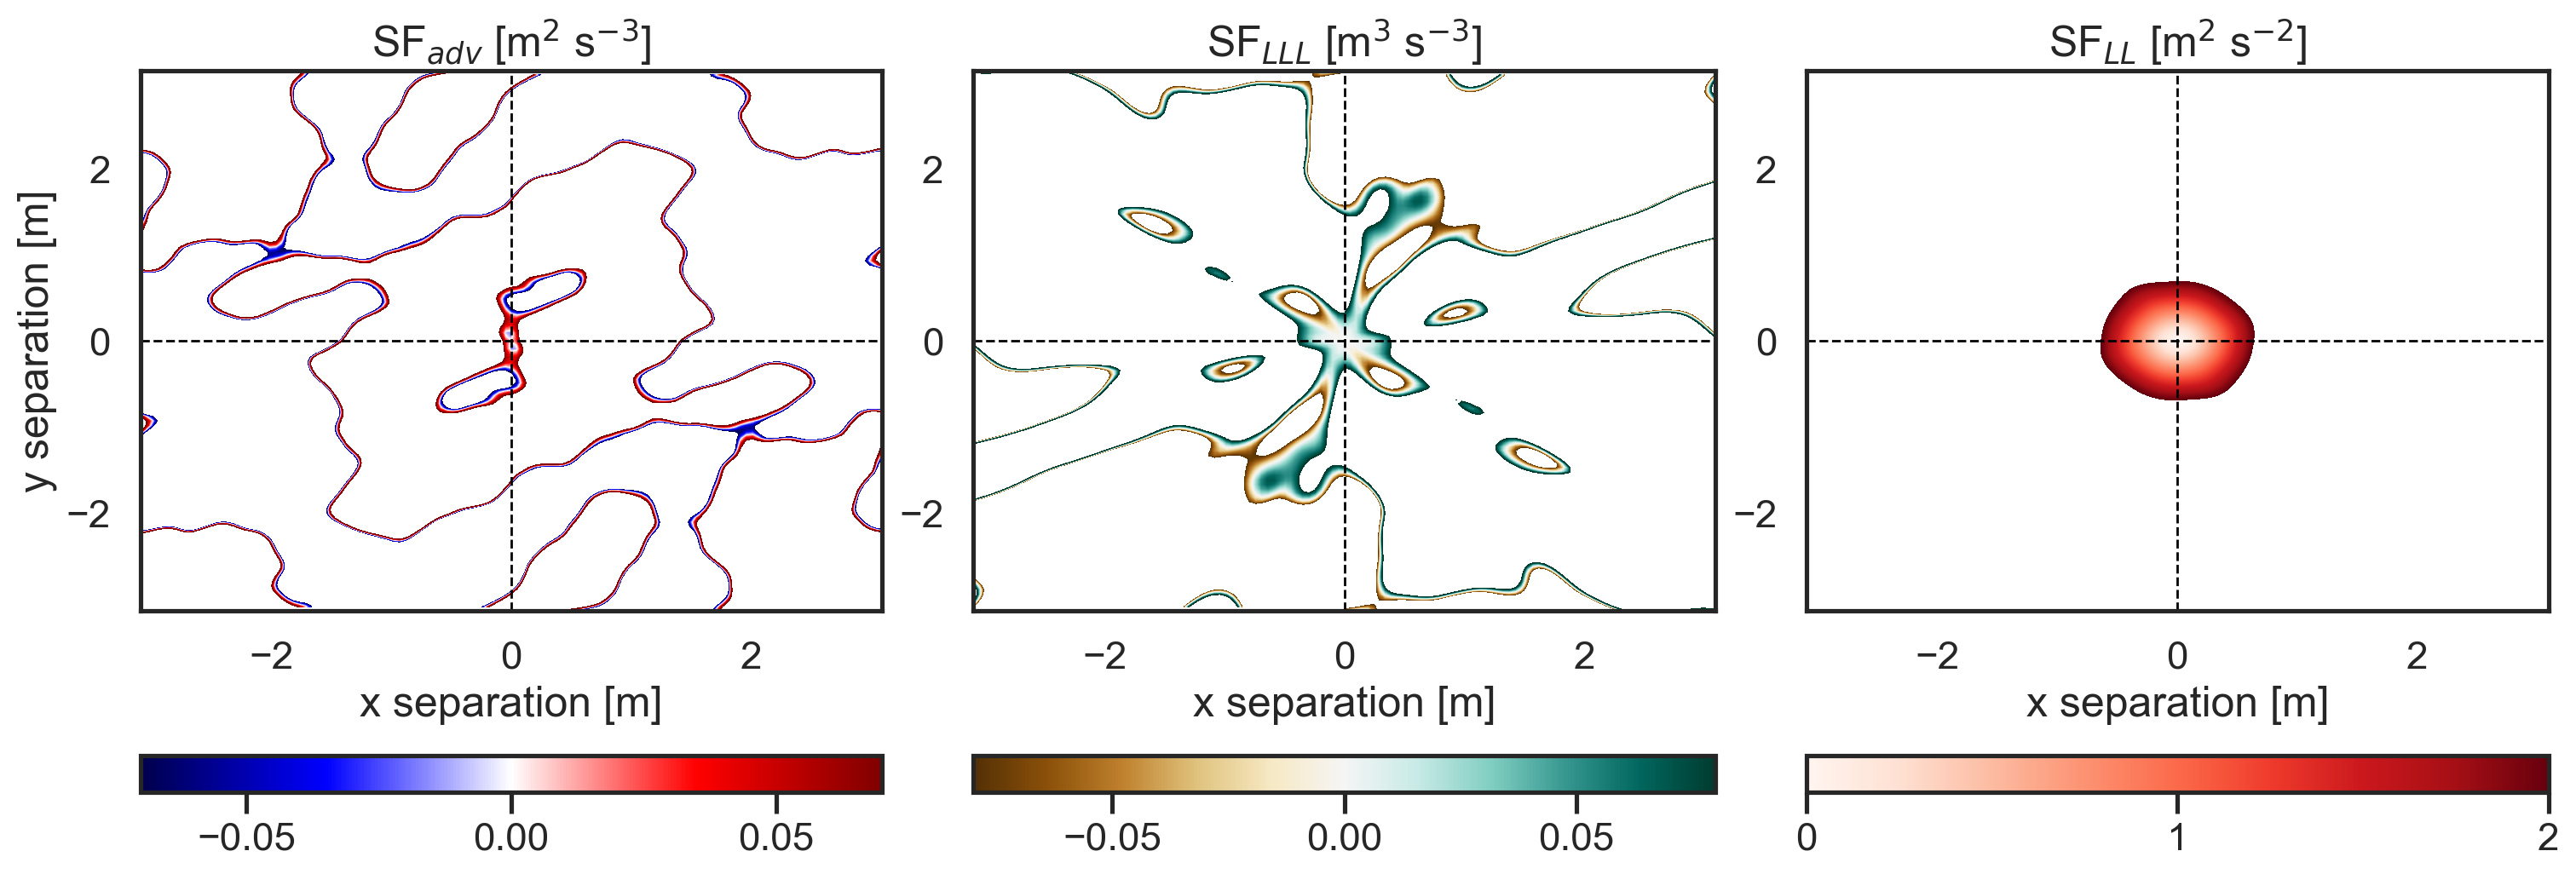

In [184]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="constrained")

Advective = axs[0].contourf(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_advective_SF,
    levels=np.linspace(-0.07, 0.07, 1001),
    cmap=plt.cm.seismic,
)
axs[0].set_xlabel("x separation [m]")
axs[0].set_ylabel("y separation [m]")
axs[0].set_title("SF$_{adv}$ [m$^2$ s$^{-3}$]")

cbar = fig.colorbar(Advective, ax=axs[0], location="bottom")
cbar.set_ticks([-0.05, 0, 0.05])
axs[0].axhline(0, color="black", linestyle="--", lw=1)
axs[0].axvline(0, color="black", linestyle="--", lw=1)

LLL = axs[1].contourf(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LLL_SF,
    levels=np.linspace(-0.08, 0.08, 1001),
    cmap=plt.cm.BrBG,
)
axs[1].set_xlabel("x separation [m]")
axs[1].set_title("SF$_{LLL}$ [m$^3$ s$^{-3}$]")

cbar = fig.colorbar(LLL, ax=axs[1], location="bottom")
cbar.set_ticks([-0.05, 0, 0.05])
axs[1].axhline(0, color="black", linestyle="--", lw=1)
axs[1].axvline(0, color="black", linestyle="--", lw=1)

LL = axs[2].contourf(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LL_SF,
    levels=np.linspace(0, 2, 1001),
    cmap=plt.cm.Reds,
)
axs[2].set_xlabel("x separation [m]")
axs[2].set_title("SF$_{LL}$ [m$^2$ s$^{-2}$]")

cbar = fig.colorbar(LL, ax=axs[2], location="bottom")
cbar.set_ticks([0, 1, 2])
axs[2].axhline(0, color="black", linestyle="--", lw=1)
axs[2].axvline(0, color="black", linestyle="--", lw=1);

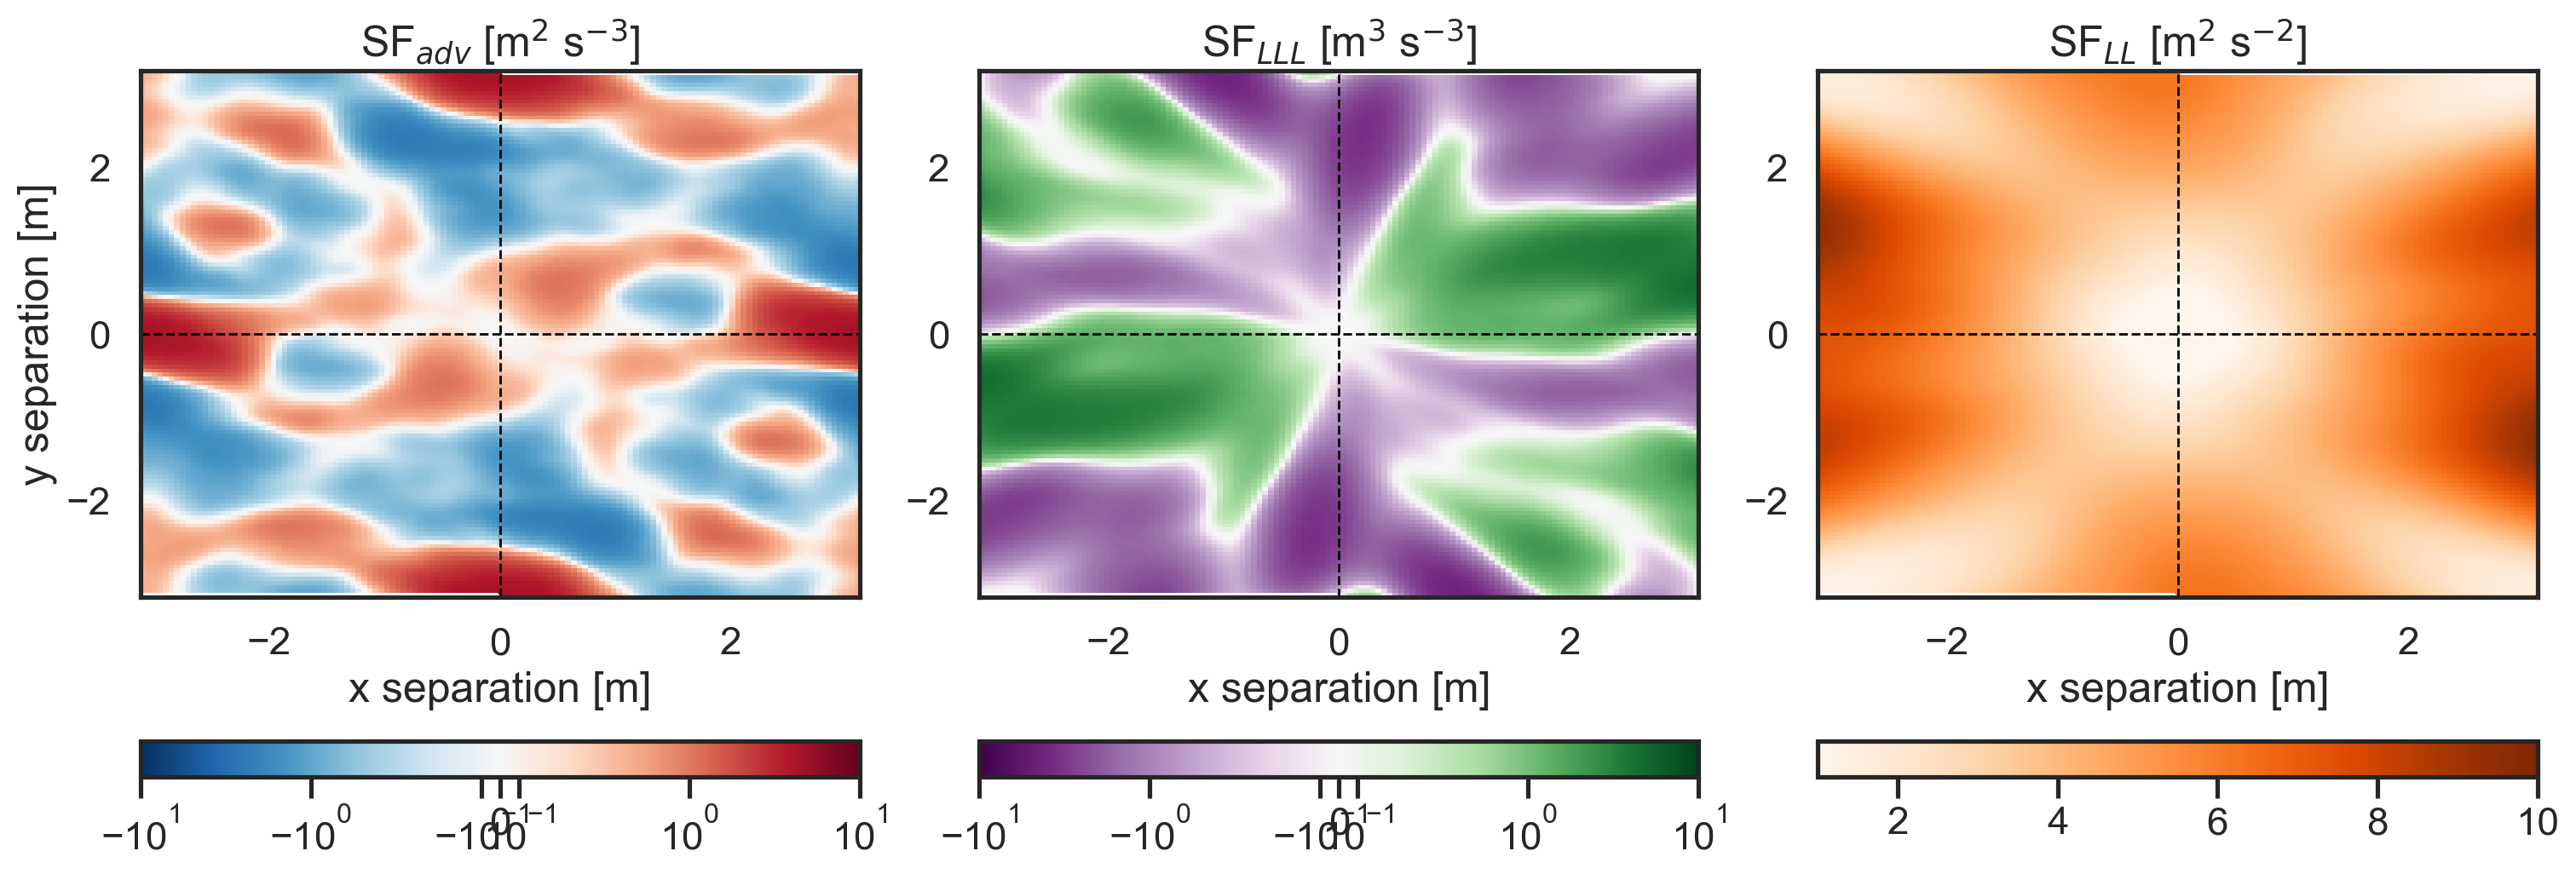

In [176]:
from matplotlib.colors import SymLogNorm, LogNorm

fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="constrained")

Advective = axs[0].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_advective_SF,
    norm=SymLogNorm(linthresh=1e-1, linscale=1e-1, vmin=-1e1, vmax=1e1),
    cmap=plt.cm.RdBu_r,
)
axs[0].set_xlabel("x separation [m]")
axs[0].set_ylabel("y separation [m]")
axs[0].set_title("SF$_{adv}$ [m$^2$ s$^{-3}$]")

cbar = fig.colorbar(Advective, ax=axs[0], location="bottom")
ticks = cbar.get_ticks()

# Remove -10e-5 and 10e-5 from the ticks
ticks = [tick for tick in ticks if tick not in [-10e-4, 10e-4]]
cbar.set_ticks(ticks)

axs[0].axhline(0, color="black", linestyle="--", lw=1)
axs[0].axvline(0, color="black", linestyle="--", lw=1)

LLL = axs[1].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LLL_SF,
    norm=SymLogNorm(linthresh=1e-1, linscale=1e-1, vmin=-1e1, vmax=1e1),
    cmap=plt.cm.PRGn,
)
axs[1].set_xlabel("x separation [m]")
axs[1].set_title("SF$_{LLL}$ [m$^3$ s$^{-3}$]")

cbar = fig.colorbar(LLL, ax=axs[1], location="bottom")
# cbar.set_ticks([-0.05, 0, 0.05])
axs[1].axhline(0, color="black", linestyle="--", lw=1)
axs[1].axvline(0, color="black", linestyle="--", lw=1)

LL = axs[2].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LL_SF,
    # norm=LogNorm(vmin=1e0, vmax=1e1),
    cmap=plt.cm.Oranges,
    vmin=1,
    vmax=10,
)
axs[2].set_xlabel("x separation [m]")
axs[2].set_title("SF$_{LL}$ [m$^2$ s$^{-2}$]")

cbar = fig.colorbar(LL, ax=axs[2], location="bottom")
# cbar.set_ticks([0, 1, 2])
axs[2].axhline(0, color="black", linestyle="--", lw=1)
axs[2].axvline(0, color="black", linestyle="--", lw=1);